## Access to Google drive folder

Allow access to our drive

In [ ]:
# Drive in notebook
from google.colab import drive
drive.mount('/content/drive', force_remount=True)# Mount the folder we want to access

Mounted at /content/drive


# Data preprocesing, Feature Engineering and Modelling

---
### Import packages

In [ ]:
# Libraries to manipulate data
import pandas as pd
import numpy as np

# Libraries to graphs
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries to datetime
from datetime import datetime
 
# Libraries to preprocessing
from sklearn.preprocessing import OneHotEncoder

# Libraries to modeling


# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

# Data preprocesing

---

1.  Load data
2. Data cleaning



---
## 1. Load data

In [ ]:
# Create dataframe from data saved after EDA task
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python_Projects/Portafolio/BCG/data/clean_data_after_eda.csv', index_col=0)
# Create dataframe of price data 
price_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python_Projects/Portafolio/BCG/data/price_data.csv', index_col=0)

In [ ]:
# Show first 3 records
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.126997,0.095024,0.049213,41.908233,16.291553,10.861037,42.035230,16.386577,10.910249,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0


In [ ]:
# Show first 3 records
price_df.head(3)

,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
id,,,,,,,
038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---
## 2. Data Cleaning


1. Irrelevant Columns
2. Duplicate records



---

### 1. Irrelevant Columns

**Sublevels**

Check that the columns do not have a single sublevel.

In [ ]:
# Count the unique elements of the columns on client dataset 
for col in df.columns:
    print(f'Column {col}: {df[col].nunique()} sublevels')

Column id: 14606 sublevels
Column channel_sales: 8 sublevels
Column cons_12m: 11065 sublevels
Column cons_gas_12m: 2112 sublevels
Column cons_last_month: 4751 sublevels
Column date_activ: 1796 sublevels
Column date_end: 368 sublevels
Column date_modif_prod: 2129 sublevels
Column date_renewal: 386 sublevels
Column forecast_cons_12m: 13993 sublevels
Column forecast_cons_year: 4218 sublevels
Column forecast_discount_energy: 12 sublevels
Column forecast_meter_rent_12m: 3528 sublevels
Column forecast_price_energy_off_peak: 516 sublevels
Column forecast_price_energy_peak: 329 sublevels
Column forecast_price_pow_off_peak: 41 sublevels
Column has_gas: 2 sublevels
Column imp_cons: 7752 sublevels
Column margin_gross_pow_ele: 2391 sublevels
Column margin_net_pow_ele: 2391 sublevels
Column nb_prod_act: 10 sublevels
Column net_margin: 11965 sublevels
Column num_years_antig: 13 sublevels
Column origin_up: 6 sublevels
Column pow_max: 698 sublevels
Column mean_year_price_off_peak_var: 4622 sublevels
C

As show below, all columns contain more than 1 sublevel, so we'll keep all columns for now.

In [ ]:
# Count the unique elements of the columns on price dataset
for col in price_df.columns:
    print(f'Columna {col}: {price_df[col].nunique()} subniveles')

Columna price_date: 12 subniveles
Columna price_off_peak_var: 1853 subniveles
Columna price_peak_var: 1189 subniveles
Columna price_mid_peak_var: 711 subniveles
Columna price_off_peak_fix: 66 subniveles
Columna price_peak_fix: 31 subniveles
Columna price_mid_peak_fix: 28 subniveles


---

### 2. Duplicate records

In [ ]:
# Count the duplicate rows on client dataset
df.duplicated().value_counts()

False    14606
dtype: int64

There are not duplicated records

# Feature Engineering

---

1. Change data types
2. Transforming boolean data
3. Feature creation
4. Transforming date data in months
5. Transforming Numerical data (Log Transform) 
6. Transforming Categorical data (One-Hot-Encoding)
7. Correlations
8. Feature extraction
9. Feature selection



---
**Graph Conversion rates**

* The conversion rates is the percentage of customers churn of the total of customers.

In [ ]:
# Graph conversion rates

def graphic_conversion_rates(var_predictor, var_predict, type='line', order=None):
    
    '''
    Prints a plot (line, bar or scatter) for the predictor variable 'var_predictor' and the variable to predict 'var_predict'.
            Parameters:
                    var_predictor (string): Predictor variable
                    var_predict (string): Variable to predict
                    type (by default 'line'): Selected graph type
                    order (by default None):  Column order
            Returns:
                    None
    '''

    # Generate groups (groupby), calculate conversion rates (mean),
    # multiply by 100 (mul(100))
    group_conv_rate = df.groupby(var_predictor)[var_predict].mean().mul(100).rename('conv_rate').reset_index()
    print(group_conv_rate)
    
    # Graphic
    if type=='line': # Useful for continuous ranges
        plt.figure(figsize=(10,6))
        sns.lineplot(x=var_predictor, y='conv_rate', data=group_conv_rate)
        plt.grid()
    elif type=='bar': # Useful whether the data is divided into ranges or is categorical
        plt.figure(figsize=(14,6))
        chart = sns.barplot(x=var_predictor, y='conv_rate', data=group_conv_rate, order=order)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
        plt.grid()
    elif type=='scatter': # Useful whether the data is divided into ranges or is categorical
        plt.figure(figsize=(10,6)) 
        sns.scatterplot(x=var_predictor, y='conv_rate', data=group_conv_rate)
        plt.grid()

---
## 1. Change data types

Before we start let's change some data types.

We need to transform the columns date_activ, date_end, date_modif_prod and date_renewal into a datetime type. To do so, we can use the *pd.to_datatime* function.

In [ ]:
# Transform date columns to datetime type
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

Transform the column price_date into a datetime data type

In [ ]:
# Transform date column to datetime type
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')

---
## 2. Transforming boolean data

We simply transform this column from being categorical to being a binary flag

* 1 = has gas

* 0 = only has electricity

In [ ]:
# we replace the column 'has_gas' by integers
df['has_gas'] = df['has_gas'].apply(lambda x: 1 if x == 't' else 0)

   has_gas  conv_rate
0        0  10.054371
1        1   8.185590


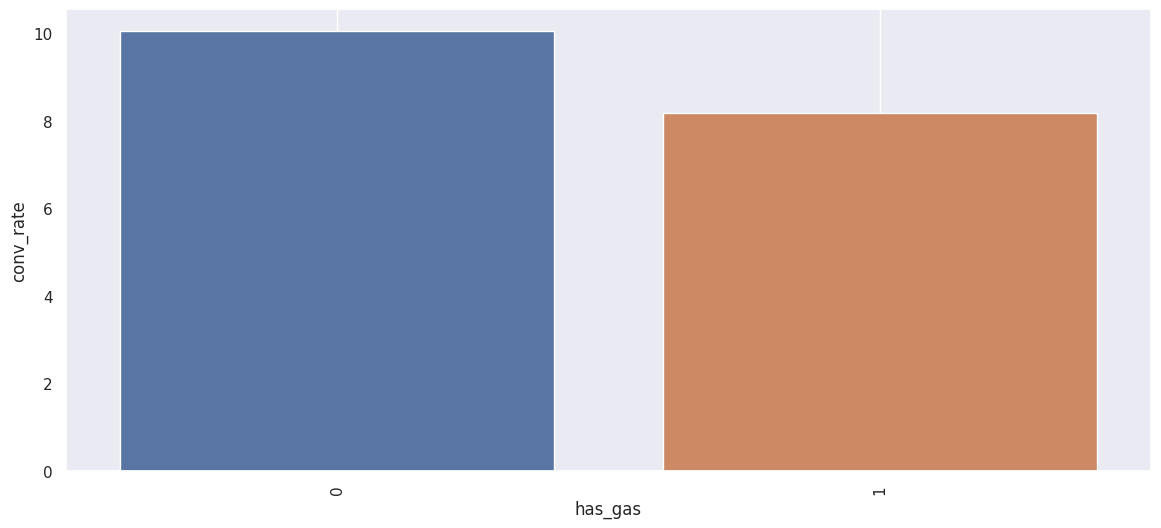

In [ ]:
# Plot the conversion rate against the variable tenure, use a bar plot
graphic_conversion_rates('has_gas', 'churn', type='bar')

**OBSERVATION**: There is a higher conversion rate in customers who do not have gas service.

If a customer also buys gas from PowerCo, it shows that they have multiple products and are a loyal customer to the brand. Hence, it is no surprise that customers who do not buy gas are almost 2% more likely to churn than customers who also buy gas from PowerCo. 

* Hence, this is a useful feature.

---
## 3. Feature creation



---
### Difference between off-peak prices in December and preceding January


    This feature may reveal macro patterns that occur over an entire year

Below is the code to calculate the feature described above.

We group by company the mean of the off-peak variable and fixed prices of each month

In [ ]:
# Group off-peak prices by companies and month and get mean of price_off_peak_var and price_off_peak_fix columns
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()
# monthly_price_by_id.shape   ->   (193002, 4)

Get january and december prices

In [ ]:
# Group by companies and get the first record (ie, january) of each company 
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
# Group by companies and get the last record (ie, december) of each company 
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

Calculate the difference between off-peak prices in December and preceding January

In [ ]:
# Calculate the difference

# Rename dec_prices columns and merge dec_prices and jan_prices dataframes
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
# Difference between price_off_peak_var in  December and January
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
# Difference between price_off_peak_fix in  December and January
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
# Keep only the columns of the differences
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


Merge the new price difference features to our main dataframe (df)  

In [ ]:
df = pd.merge(df, diff, on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.049213,41.908233,16.291553,10.861037,42.035230,16.386577,10.910249,1,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0,-0.006192,0.162916


---
### Average price changes across periods

Calculating the average price changes across individual periods


This feature may be useful because it adds more granularity to the previous feature.  Instead of looking at differences across an entire year, this look at mean average price differences across different time periods (`off_peak`, `peak`, `mid_peak`). 


    This feature may reveal patterns on a micro scale between months.

In [ ]:
# Aggregate average prices per period by company
mean_prices = price_df.groupby(['id']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [ ]:
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [ ]:
# Keep only the columns of the differences
columns = [
    'id', 
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff', 
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff', 
    'peak_mid_peak_fix_mean_diff', 
    'off_peak_mid_peak_fix_mean_diff'
]

# Merge the features to our main dataframe (df)
df = pd.merge(df, mean_prices[columns], on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_mid_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,10.910249,1,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,0,-0.003767,0.177779,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,0,-0.004670,0.177779,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,0,-0.004547,0.177779,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,16.365274,0,-0.006192,0.162916,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893


---

### Max price changes across periods and months

To look at the maximum change in prices across periods and months, it can help to see sudden price changes between months.

    This feature can be a predictor, because a large increase in prices within a short time span can be an influential factor in looking for other utility providers.

In [ ]:
# Aggregate average prices per period by company
mean_prices_by_month = price_df.groupby(['id', 'price_date']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [ ]:
# Calculate the mean difference between consecutive periods
mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

In [ ]:
# Calculate the maximum monthly difference across time periods
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [ ]:
# Create a list to keep only the columns of the differences
columns = [
    'id',
    'off_peak_peak_var_max_monthly_diff',
    'peak_mid_peak_var_max_monthly_diff',
    'off_peak_mid_peak_var_max_monthly_diff',
    'off_peak_peak_fix_max_monthly_diff',
    'peak_mid_peak_fix_max_monthly_diff',
    'off_peak_mid_peak_fix_max_monthly_diff'
]

# Merge the features to our main dataframe (df)
df = pd.merge(df, max_diff_across_periods_months[columns], on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,off_peak_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.058257,18.590255,7.450670,26.040925,0.060550,0.085483,0.146033,44.266930,8.145775,44.26693
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.149609,44.311375,0.000000,44.311375,0.151367,0.085483,0.151367,44.444710,0.000000,44.44471
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.170512,44.385450,0.000000,44.385450,0.084587,0.089162,0.172468,44.444710,0.000000,44.44471
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.151210,44.400265,0.000000,44.400265,0.153133,0.000000,0.153133,44.444710,0.000000,44.44471
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.051309,16.275263,8.137629,24.412893,0.022225,0.033743,0.055866,16.291555,8.145775,24.43733


---
### Tenure

How long a company has been a client of PowerCo.


* Tenure at the company in **months** (date of activation of the contract **-** registered date of the end of the contract)


Below is the code to calculate the feature described above.

In [ ]:
# create new column to save the tenure of each company
df['tenure'] = ((df['date_end'] - df['date_activ'])/ np.timedelta64(1, 'Y')). astype(int)

    tenure  conv_rate
0        2  13.307985
1        3  14.371257
2        4  12.575638
3        5   8.542550
4        6   8.071313
5        7   7.339450
6        8   4.800000
7        9   2.409639
8       10   2.000000
9       11   6.358382
10      12   8.333333
11      13   9.523810


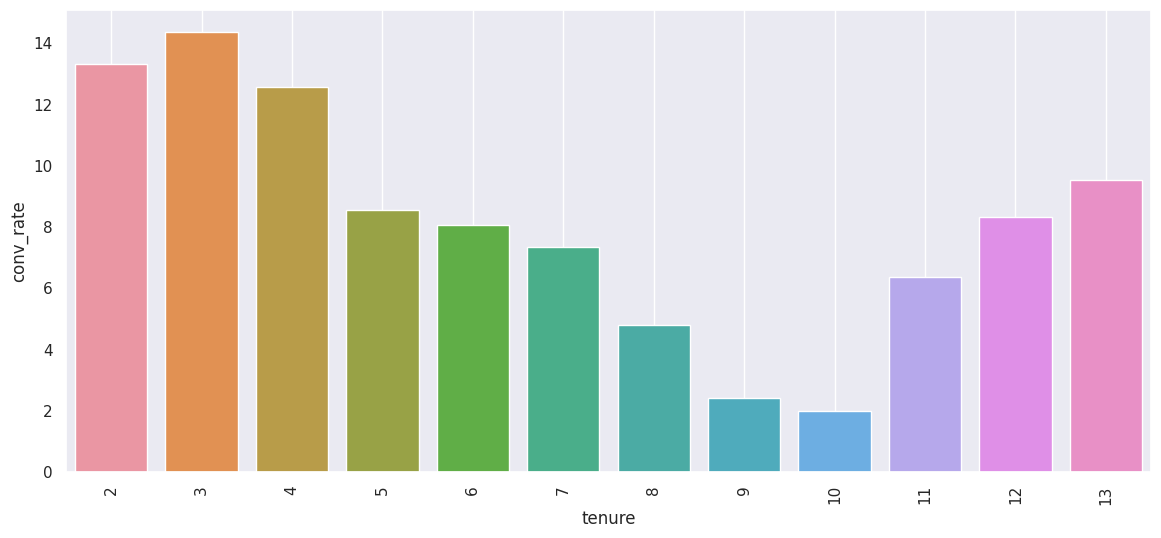

In [ ]:
# Plot the conversion rate against the variable tenure, use a bar plot
graphic_conversion_rates('tenure', 'churn', type='bar')

**OBSERVATION**: Companies with tenure of contract less or equal than 4 years have highest conversion rates, so are more likely to churn.


* Interestingly, the difference between 4 and 5 months is about 4%, which represents a large jump in likelihood for a customer to churn compared to the other differences between ordered tenure values. Perhaps this reveals that getting a customer to over 4 months tenure is actually a large milestone with respect to keeping them as a long term customer. 

    
    "Tenure" could be a predictor variable, because clearly how long you've been a client, has a influence on the chance of a client churning.


---
### Conversion rates

Calculate conversion rates for the numerical variables and see if we can extract relevant information or whether this variable is important.

* The conversion rates is the percentage of customers churn of the total of customers.


* Variable **imp_cons** 

Current paid consumption

      imp_cons   conv_rate
0         0.00    9.272167
1         0.06  100.000000
2         0.09    0.000000
3         0.10   40.000000
4         0.14  100.000000
...        ...         ...
7747   6787.12    0.000000
7748   8254.16    0.000000
7749   8732.60    0.000000
7750   9682.89    0.000000
7751  15042.79    0.000000

[7752 rows x 2 columns]


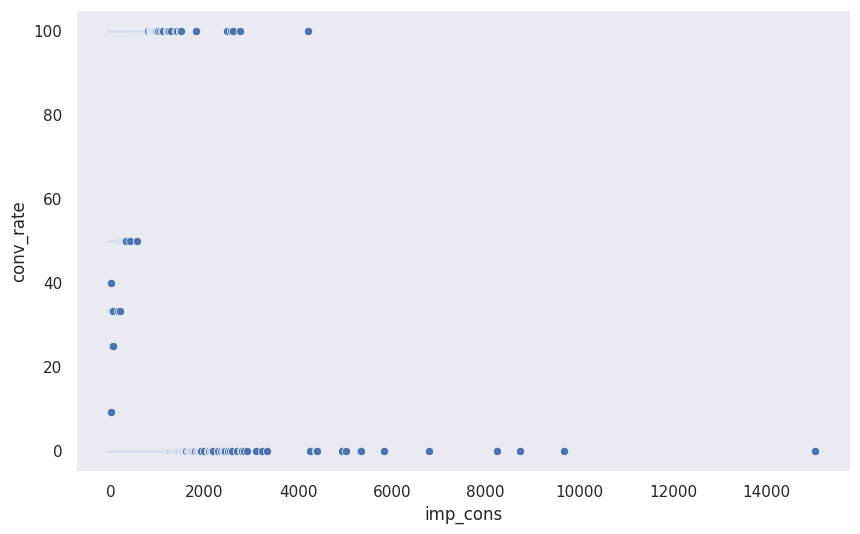

In [ ]:
# Plot the conversion rate against the variable imp_cons, use a scatter plot
graphic_conversion_rates('imp_cons', 'churn', type='scatter')

In this case, we can observe differences in the conversion rates by Current paid consumption. 

We could establish two approximate ranges:
* <3,000 and >= 3,000

  group_imp_cons  conv_rate
0         < 3000   9.720318
1       >= 3,000   5.555556


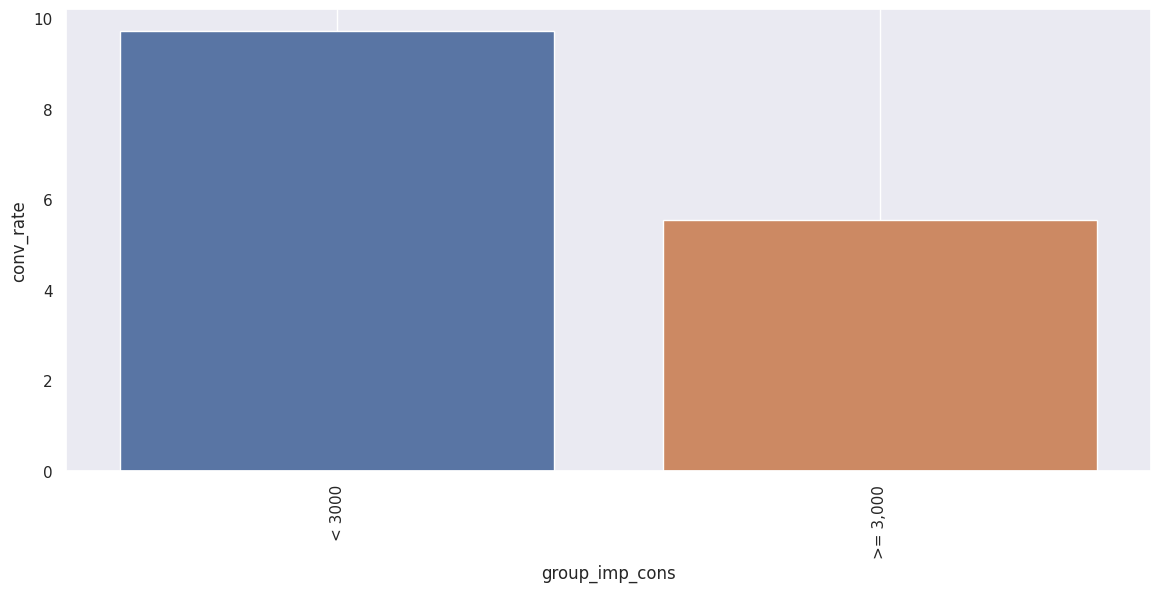

In [ ]:
# Let's create subgroups of Current paid consumption and calculate the conversion rates in each case

# New column into dataset: "group_cons_12m"
df.loc[:, 'group_imp_cons'] = "< 3000"
df.loc[df['imp_cons'] >= 3000, 'group_imp_cons'] = ">= 3,000"

# And let's graph the conversion rate for this new column
graphic_conversion_rates('group_imp_cons','churn',type='bar')

---
Observation:
* The conversion rate is higher with almost 10% for values <3000 of the current paid consumption
* "imp_cons" could be a predictor variable
---

In [ ]:
# column imp_cons is no longer needed so we remove it 
df.drop(columns=['imp_cons'], inplace=True)

* Variable **margin_gross_pow_ele** 

Gross margin on power subscription


      margin_gross_pow_ele   conv_rate
0                     0.00   18.471338
1                     0.03  100.000000
2                     0.12    6.400000
3                     0.24   18.750000
4                     0.36    0.000000
...                    ...         ...
2386                225.12    0.000000
2387                248.64    0.000000
2388                299.64  100.000000
2389                314.76    0.000000
2390                374.64    0.000000

[2391 rows x 2 columns]


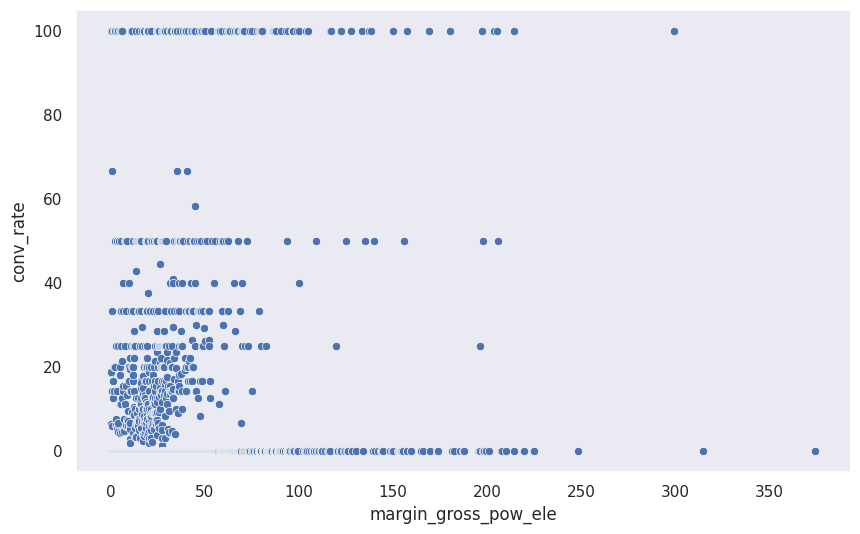

In [ ]:
# Plot the conversion rate against the variable margin_gross_pow_ele, use a scatter plot
graphic_conversion_rates('margin_gross_pow_ele', 'churn', type='scatter')

In this case, we can observe differences in the conversion rates by Gross margin on power subscription. 

We could establish two approximate ranges:
* <900 and >= 90

  group_margin_gross_pow_ele  conv_rate
0                       < 90   9.528439
1                      >= 90  22.705314


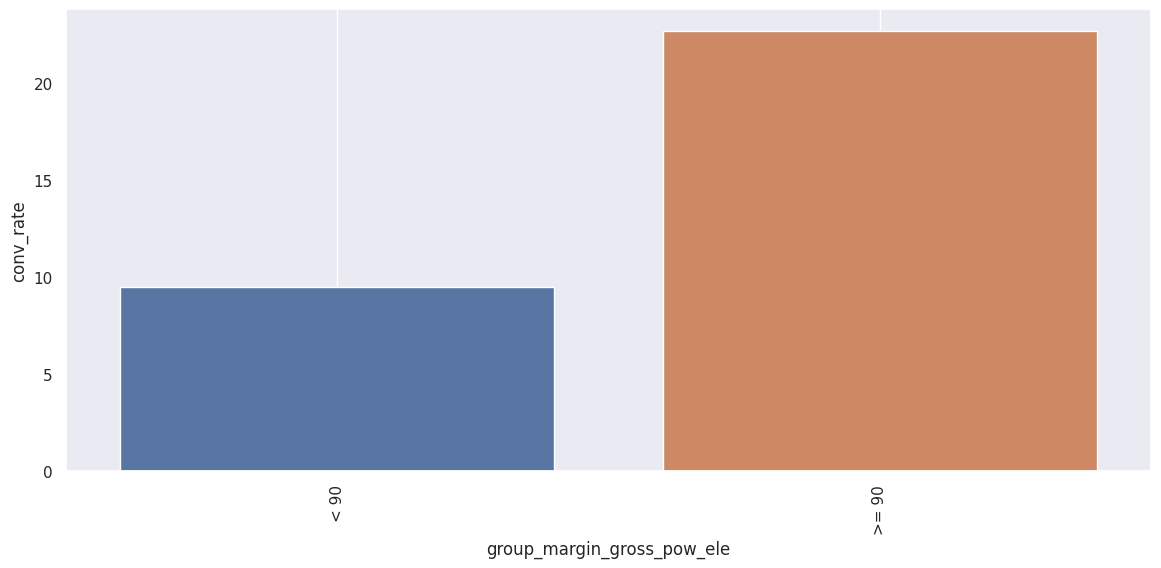

In [ ]:
# Let's create subgroups of the Gross margin on power subscription and calculate the conversion rates in each case

# New column into dataset: "group_margin_gross_pow_ele"
df.loc[:, 'group_margin_gross_pow_ele'] = "< 90"
df.loc[df['margin_gross_pow_ele'] >= 90, 'group_margin_gross_pow_ele'] = ">= 90"

# And let's graph the conversion rate for this new column
graphic_conversion_rates('group_margin_gross_pow_ele','churn',type='bar')

---
Observation:
* The conversion rates in the variable "margin_gross_pow_ele" are:
    * values <90 (9.5%) and values >= 90 (23.5%)
    * That is, customers with a Gross margin on power subscription greater than or equal 90 have higher likely to churn.
* "margin_gross_pow_ele" could be a predictor variable.
---

In [ ]:
# column margin_gross_pow_ele is no longer needed so we remove it 
df.drop(columns=['margin_gross_pow_ele'], inplace=True)

* Variable **nb_prod_act** 

number of active products and services


   nb_prod_act  conv_rate
0            1   9.981629
1            2   8.507157
2            3   9.942639
3            4  10.000000
4            5   9.677419
5            6   0.000000
6            8   0.000000
7            9   0.000000
8           10   0.000000
9           32   0.000000


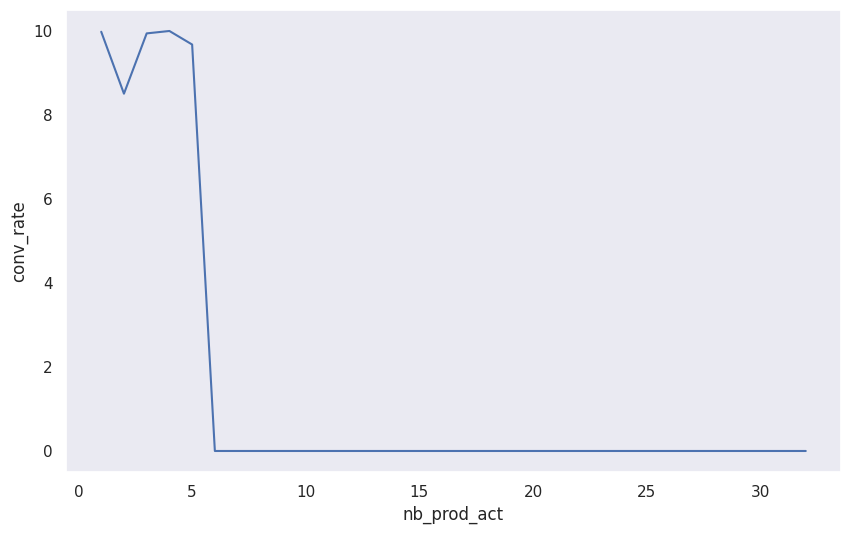

In [ ]:
# Plot the conversion rate against the variable nb_prod_act, use a scatter plot
graphic_conversion_rates('nb_prod_act', 'churn')

---
Observation:
* The conversion rate ranges from 8%-10% for customers with less than or equal to 5 active products and services.
* For customers with more than 5 products they have a conversion rate equal to 0%.
* "nb_prod_act" could be a predictor variable
---

* Variable **net_margin** 

Total net margin


       net_margin   conv_rate
0            0.00    9.189189
1            0.01    0.000000
2            0.02    0.000000
3            0.03    0.000000
4            0.04   33.333333
...           ...         ...
11960     3768.16  100.000000
11961     4305.79    0.000000
11962     4346.37    0.000000
11963    10203.50    0.000000
11964    24570.65  100.000000

[11965 rows x 2 columns]


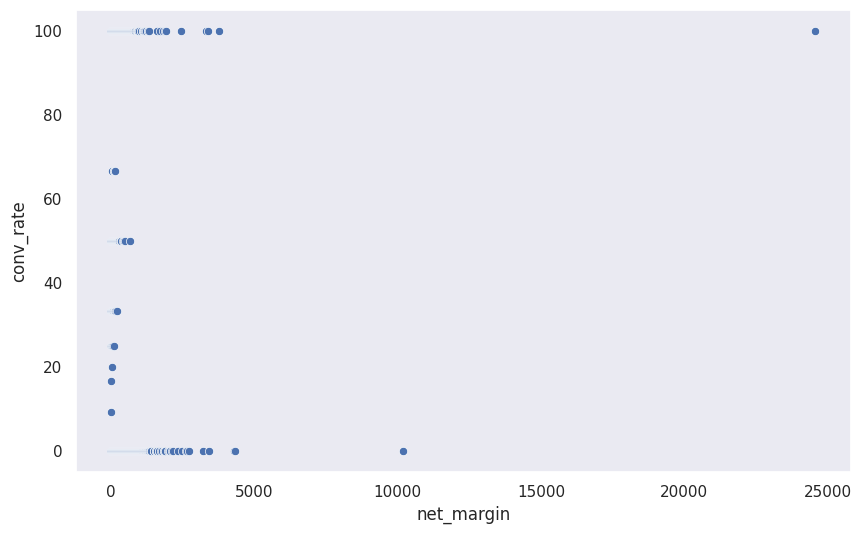

In [ ]:
# Plot the conversion rate against the variable net_margin, use a scatter plot
graphic_conversion_rates('net_margin', 'churn', type='scatter')

In this case, we can observe differences in the conversion rates by Total net margin . 

We could establish two approximate ranges:
* <=1250 and > 1250

  group_net_margin  conv_rate
0          <= 1250   9.664559
1           > 1250  22.413793


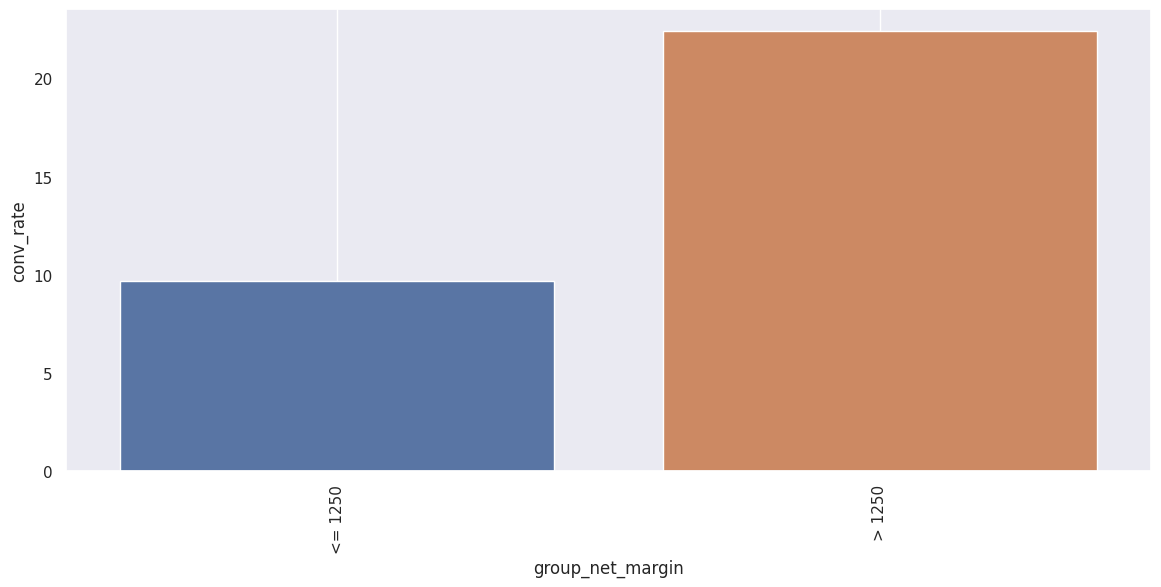

In [ ]:
# Let's create subgroups of the Total net margin and calculate the conversion rates in each case

# New column into dataset: "group_net_margin"
df.loc[:, 'group_net_margin'] = "<= 1250"
df.loc[df['net_margin'] > 1250, 'group_net_margin'] = "> 1250"

# And let's graph the conversion rate for this new column
graphic_conversion_rates('group_net_margin','churn',type='bar')

---
Observacion:
* Customers with a total net margin greater than 1250 have higher churn rates (24%) compared to customers with less than or equal 1250 of total net margin (9.5%). 
* "net_margin" could be a predictor variable.
---

In [ ]:
# Column "balance" is no longer needed, so we remove it
df.drop(columns=['net_margin'], inplace=True)

* Variable **num_years_antig** 

Antiquity of the client (in number of years)


    num_years_antig  conv_rate
0                 1   0.000000
1                 2  27.272727
2                 3  13.522400
3                 4  11.853340
4                 5   8.631852
5                 6   7.108408
6                 7   8.251473
7                 8   4.854369
8                 9   1.086957
9                10   4.938272
10               11   6.486486
11               12  10.000000
12               13   7.692308


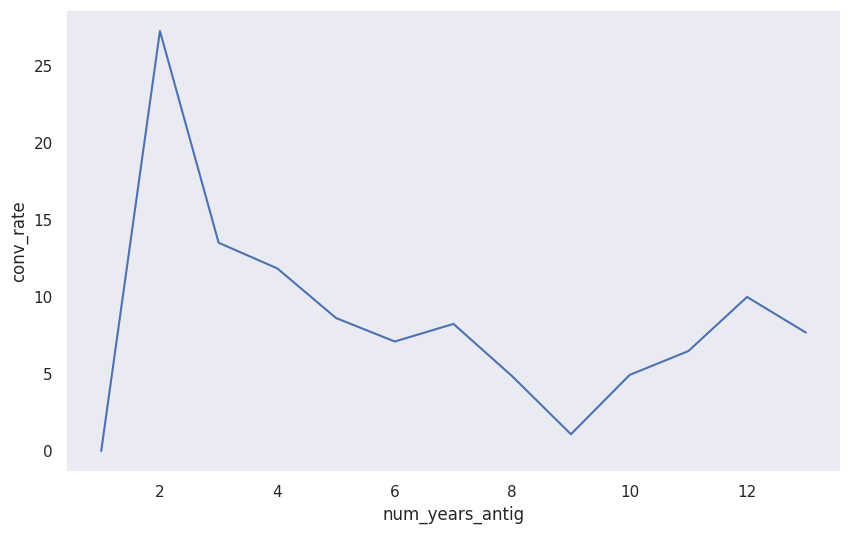

In [ ]:
# Plot the conversion rate against the variable num_years_antig, use a scatter plot
graphic_conversion_rates('num_years_antig', 'churn')

In this case, we can observe differences in the conversion rates by Antiquity of the client . 

We could establish two approximate ranges:
* <5 and >= 5

  group_num_years_antig  conv_rate
0                   < 5  12.509725
1                  >= 5   7.519257


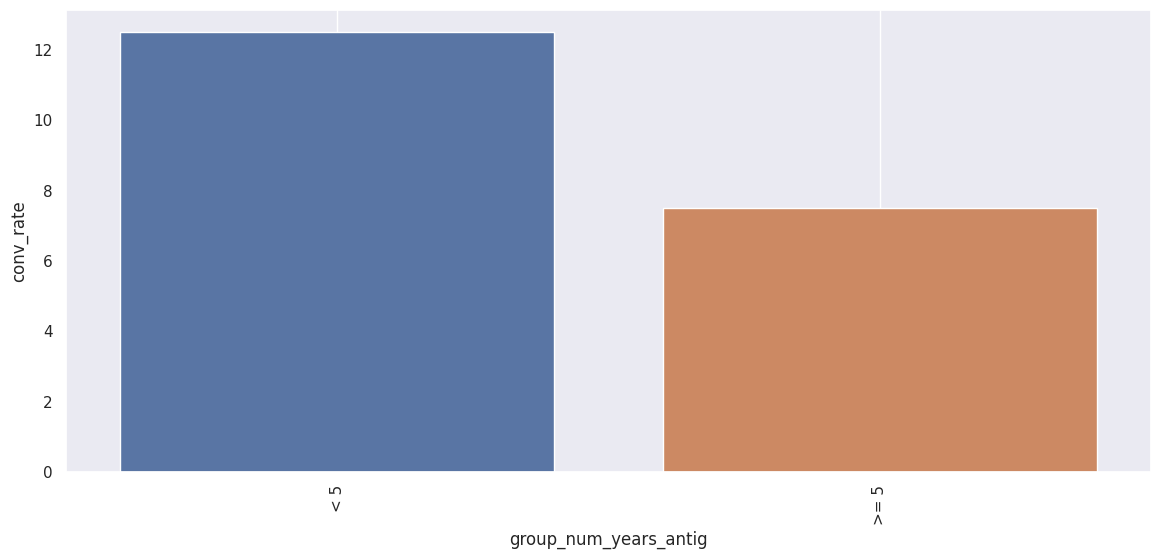

In [ ]:
# Let's create subgroups of Antiquity of the client (in number of years) and calculate the conversion rates in each case

# New column into dataset: "group_num_years_antig"
df.loc[:, 'group_num_years_antig'] = "< 5"
df.loc[df['num_years_antig'] >= 5, 'group_num_years_antig'] = ">= 5"

# And let's graph the conversion rate for this new column
graphic_conversion_rates('group_num_years_antig','churn',type='bar')

---
Observation:
* The highest conversion rate is of 13% to customers with less than 5 antiquity years, while for customers with greater than or equal to 5 antiquity years it is 7.5%.
* "num_years_antig" could be a predictor variable.
---

In [ ]:
# column num_years_antig is no longer needed, so we remove it 
df.drop(columns=['num_years_antig'], inplace=True)

* Variable **pow_max** 

Subscribed power


     pow_max  conv_rate
0      3.300        0.0
1      3.464        0.0
2      4.000        0.0
3      5.000        0.0
4      5.196        0.0
..       ...        ...
693  180.000        0.0
694  192.000        0.0
695  200.000        0.0
696  260.000        0.0
697  320.000      100.0

[698 rows x 2 columns]


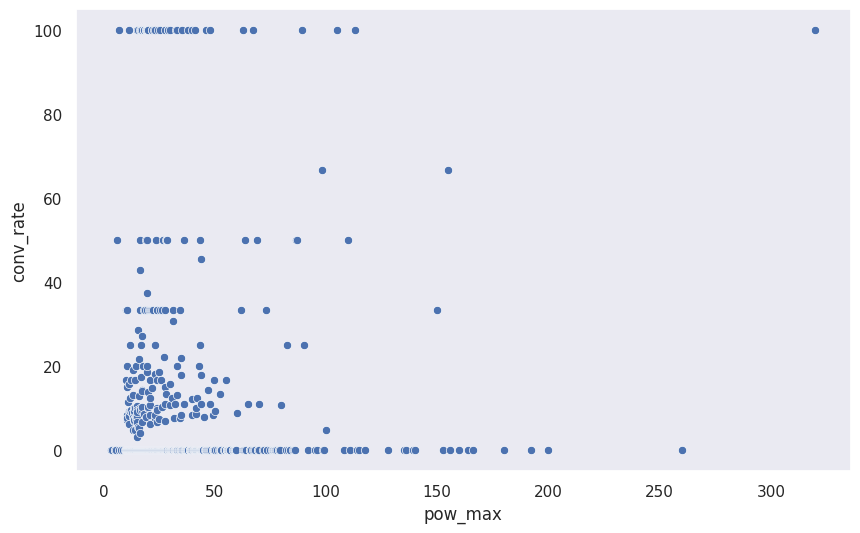

In [ ]:
# Plot the conversion rate against the variable pow_max, use a scatter plot
graphic_conversion_rates('pow_max', 'churn', type='scatter')

In this case, we can observe differences in the conversion rates by subcribed power. 

We could establish two approximate ranges:
* <75 and >= 75

  group_pow_max  conv_rate
0          < 75   9.673175
1         >= 75  13.414634


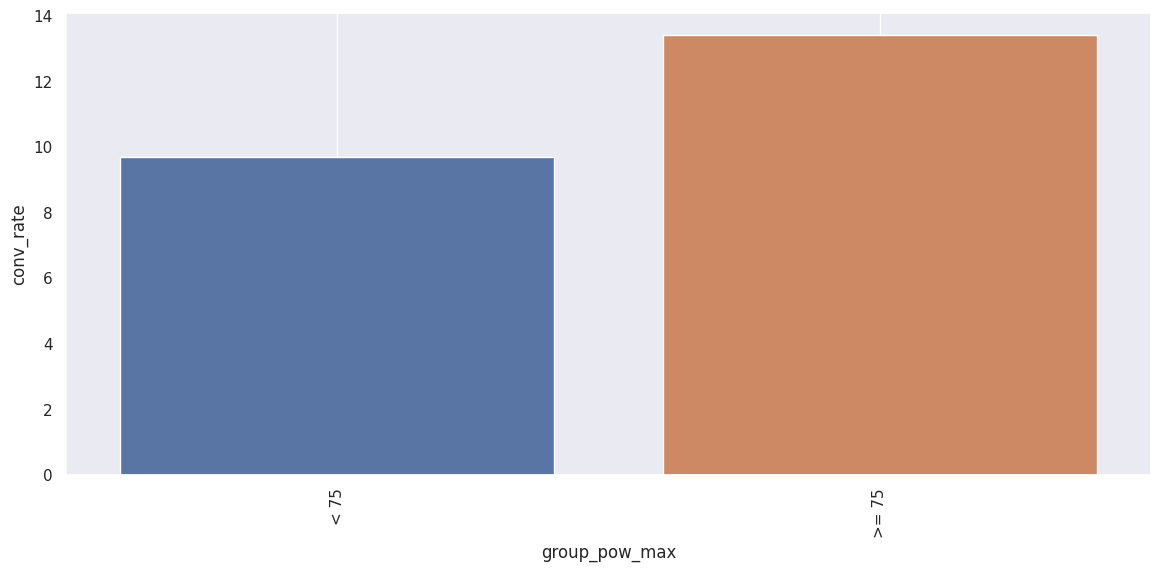

In [ ]:
# Let's create subgroups of Subscribed power and calculate the conversion rates in each case

# New column into dataset: "group_pow_max"
df.loc[:, 'group_pow_max'] = "< 75"
df.loc[df['pow_max'] >= 75, 'group_pow_max'] = ">= 75"

# And let's graph the conversion rate for this new column
graphic_conversion_rates('group_pow_max','churn',type='bar')

---
Observation:
* The higest conversion rate is 13.5% for clients with >=75 subscribed power, while for clients with <75 subscribed power it's 9.7%.
* Therefore, the clients with the highest subscribed Power are who churning more.
* "pow_max" can be a predictor variable.
---

In [ ]:
# column num_years_antig is no longer needed, so we remove it 
df.drop(columns=['pow_max'], inplace=True)

In [ ]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,tenure,group_imp_cons,group_margin_gross_pow_ele,group_net_margin,group_num_years_antig,group_pow_max
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.146033,44.26693,8.145775,44.26693,3,< 3000,< 90,<= 1250,< 5,< 75
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.151367,44.44471,0.000000,44.44471,7,< 3000,< 90,<= 1250,>= 5,< 75
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.172468,44.44471,0.000000,44.44471,6,< 3000,< 90,<= 1250,>= 5,< 75


Now we have more categorical variables and need transform to numerical variables, in this case the variables are ordinal variables, so we'll use **Ordinal Encoding**.

In [ ]:
# Get list of categorical variables
str_obj = (df.dtypes == 'object')
new_object_cols = list(str_obj[str_obj].index)

print("Categorical variables:")
print(new_object_cols)

Categorical variables:
['id', 'channel_sales', 'origin_up', 'group_imp_cons', 'group_margin_gross_pow_ele', 'group_net_margin', 'group_num_years_antig', 'group_pow_max']


In [ ]:
 # delete id, channel_sales and  origin_up variable
del new_object_cols[:3]
new_object_cols

['group_imp_cons',
 'group_margin_gross_pow_ele',
 'group_net_margin',
 'group_num_years_antig',
 'group_pow_max']

Scikit-learn has a OrdinalEncoder class that can be used to get ordinal encodings. 

In [ ]:
# We loop over the categorical variables and apply the ordinal encoder separately to each column.
from sklearn.preprocessing import OrdinalEncoder

# Make copy to avoid changing original data 
#df_encoded = df.copy()

# Apply ordinal encoder to each column with categorical data
ordinal_encoded = OrdinalEncoder()
df[new_object_cols] = ordinal_encoded.fit_transform(df[new_object_cols])

In [ ]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,tenure,group_imp_cons,group_margin_gross_pow_ele,group_net_margin,group_num_years_antig,group_pow_max
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.146033,44.26693,8.145775,44.26693,3,0.0,0.0,0.0,0.0,0.0
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.151367,44.44471,0.000000,44.44471,7,0.0,0.0,0.0,1.0,0.0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.172468,44.44471,0.000000,44.44471,6,0.0,0.0,0.0,1.0,0.0


---
## 4. Transforming date data in months

Dates as a datetime object are not useful for a predictive model, so we needed to use the datetimes to create some other features that may hold some predictive power.

Getting information about the date columns, taking as a reference the date 2016-01-01 as it is the consecutive year of the given data

* **months_activ** = Number of months active until reference date.

* **months_to_end** = Number of months of the end contract until reference date.

* **months_modif_prod** = Number of months since last modification in any product until reference date.

* **months_renewal** = Number of months since last renewal until reference date.

Below is the code to calculate the feature described above.

In [ ]:
# Function to transform dates in months
def get_months(reference_date, df, column): 
    """
    Input: a column with timedeltas
    Return: months
    """
    time_delta = reference_date - df[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int) 
    
    return months

In [ ]:
#  taking as a reference the date 2016-01-01 as it is the consecutive year of the given data
reference_date = datetime(2016, 1, 1)

# Create columns
df['months_activ'] = get_months(reference_date, df, 'date_activ')
df['months_to_end'] = -get_months(reference_date, df, 'date_end')
df['months_modif_prod'] = get_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = get_months(reference_date, df, 'date_renewal')

# We no longer need the datetime columns that we used for feature engineering (date columns), so we can drop them
remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

df = df.drop(columns=remove)
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,tenure,group_imp_cons,group_margin_gross_pow_ele,group_net_margin,group_num_years_antig,group_pow_max,months_activ,months_to_end,months_modif_prod,months_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,3,0.0,0.0,0.0,0.0,0.0,30,5,2,6
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,189.95,0,0.0,16.27,0.145711,...,7,0.0,0.0,0.0,1.0,0.0,76,7,76,4
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,...,6,0.0,0.0,0.0,1.0,0.0,68,3,68,8
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,...,6,0.0,0.0,0.0,1.0,0.0,69,2,69,9
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,445.75,526,0.0,131.73,0.116900,...,6,0.0,0.0,0.0,1.0,0.0,71,2,71,9


**OBSERVATION**: 

* *months_activ*: considering that a client who has been an active client for a longer amount of time may have more loyalty to the brand and is more likely to stay than a newer client.
* *months_to_end*: it may reveal patterns and behaviours about timing of churn, because if a client are coming toward the end of your contract with PowerCo could be in some of these situations:
    * looking for better deals
    * sign the contract again
    * if client have only just joined, you may have a period where you're allowed to leave if are not satisfied
    * If are in the middle of the contract and want to leave, may be charges, wich can deterring clients from churning mid-way through their agreement 
* *months_modif_prod*: can be a positive signal that is satisfied with the PowerCo' services. It may shows the degree of how 'engaged' a client is with PowerCo.
* *months_renewal*: it shows the degree to which that client is engaged.
    * If a client renews their contract it shows a level of commitment.


---
## 5. Transforming Numerical data (Log Transform) 

As we could see earlier, there are 10 numerical variables with a skewed highly distribution.

We need to treat skewness because some predictive models have inherent assumptions about the distribution of the features that are beign supplied to it, they assume that all variables are both independent and normally distributed.

We'll use Logarithm transformation to treat the positively skewed features.

---
### Log Transform

It is primarily used to convert a skewed distribution to a normal distribution/less-skewed distribution. Also, decreases the efect of **outliers** (due to the normalizationof magnitude differences).

Features:
- cons_12m
- cons_gas_12m
- cons_last_month
- forecast_cons_12m
- forecast_cons_year
- forecast_discount_energy
- forecast_meter_rent_12m
- forecast_price_energy_off_peak
- forecast_price_energy_peak
- forecast_price_pow_off_peak


In [ ]:
# List of numerical variables with a skewed distribution
num_skewed_cols = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak' ]

First we see the statistics of the skewed features, so that we can compare before and after transformation.
* We can see that the standard deviation for most of these features is quite high.

In [ ]:
df[num_skewed_cols].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378


Now apply Logarithm transformation to continuous numeric columns

In [ ]:
# Function for logarithmic transformation using log10, we add 1 because we cannot apply log to a value of 0
def log_transform(col):
    return  np.log10(col + 1)
    
# Appy log_transformation to the list num_skewed_cols
df[num_skewed_cols] = df[num_skewed_cols].apply(log_transform)

In [ ]:
# see the statistics of the skewed features
df[num_skewed_cols].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,4.223939,0.779244,2.264646,2.962177,1.784610,0.050918,1.517203,0.055766,0.020918,1.636058
std,0.884515,1.717071,1.769305,0.683592,1.584986,0.267388,0.571481,0.009438,0.020296,0.134237
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.754023,0.000000,0.000000,2.695477,0.000000,0.000000,1.235023,0.047796,0.000000,1.619163
50%,4.149727,0.000000,2.899547,3.046836,2.498311,0.000000,1.296555,0.058109,0.035085,1.656207
75%,4.610285,0.000000,3.529430,3.380716,3.242231,0.000000,2.120673,0.059316,0.040933,1.656207
max,6.792889,6.618528,5.887169,4.918575,5.243970,1.491362,2.778376,0.105157,0.077722,1.780075


Now we can see that for the majority of the features, their standard deviation is much lower after transformation. This is a good thing, it shows that these features are more stable and predictable now.


We use histograms to observe the distribution of thesse variables.

<ipython-input-56-f63759cfd0e3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
<ipython-input-56-f63759cfd0e3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
<ipython-input-56-f63759cfd0e3>:5: U

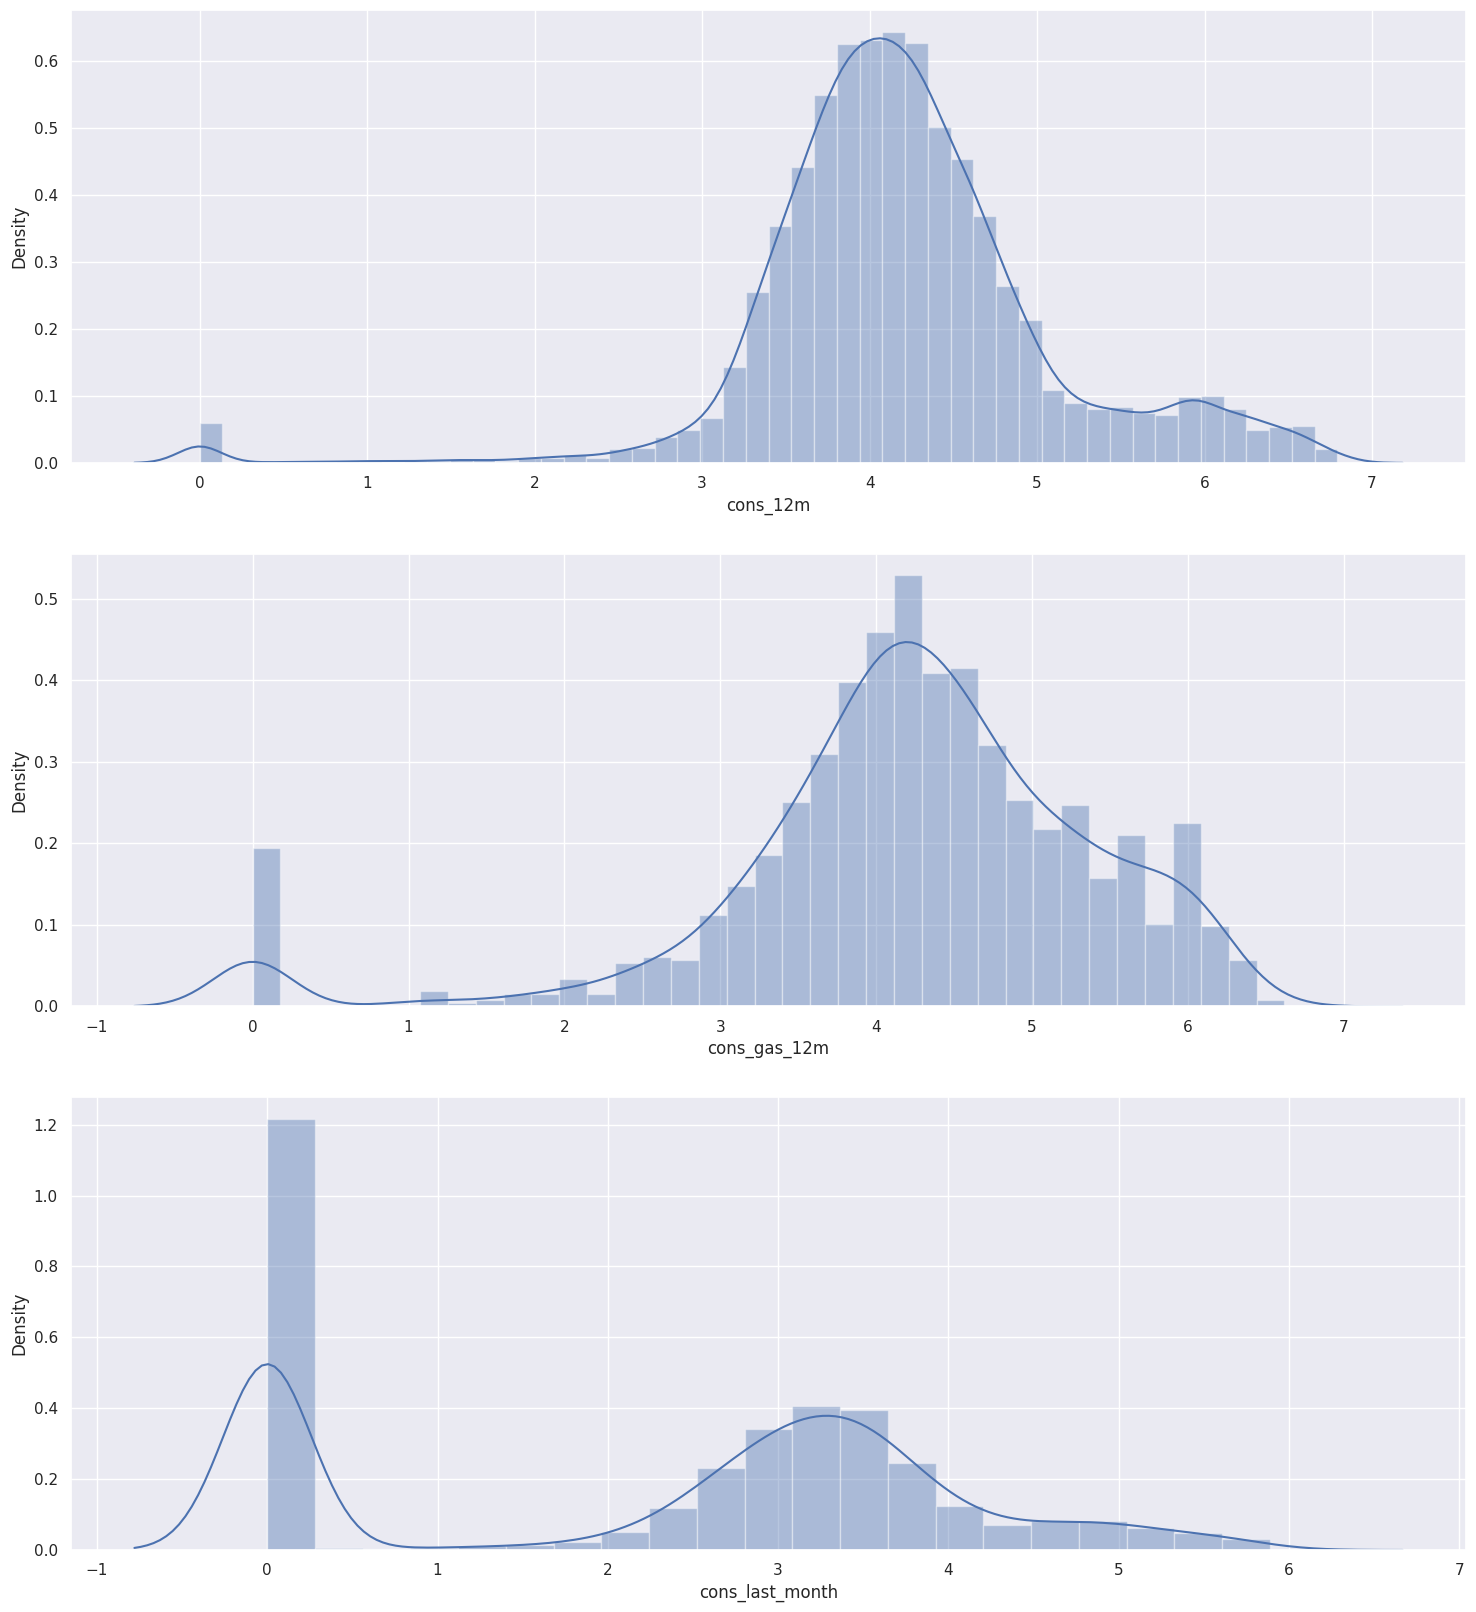

In [ ]:
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))
# Plot histograms
sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((df["cons_last_month"].dropna()), ax=axs[2])
plt.show()

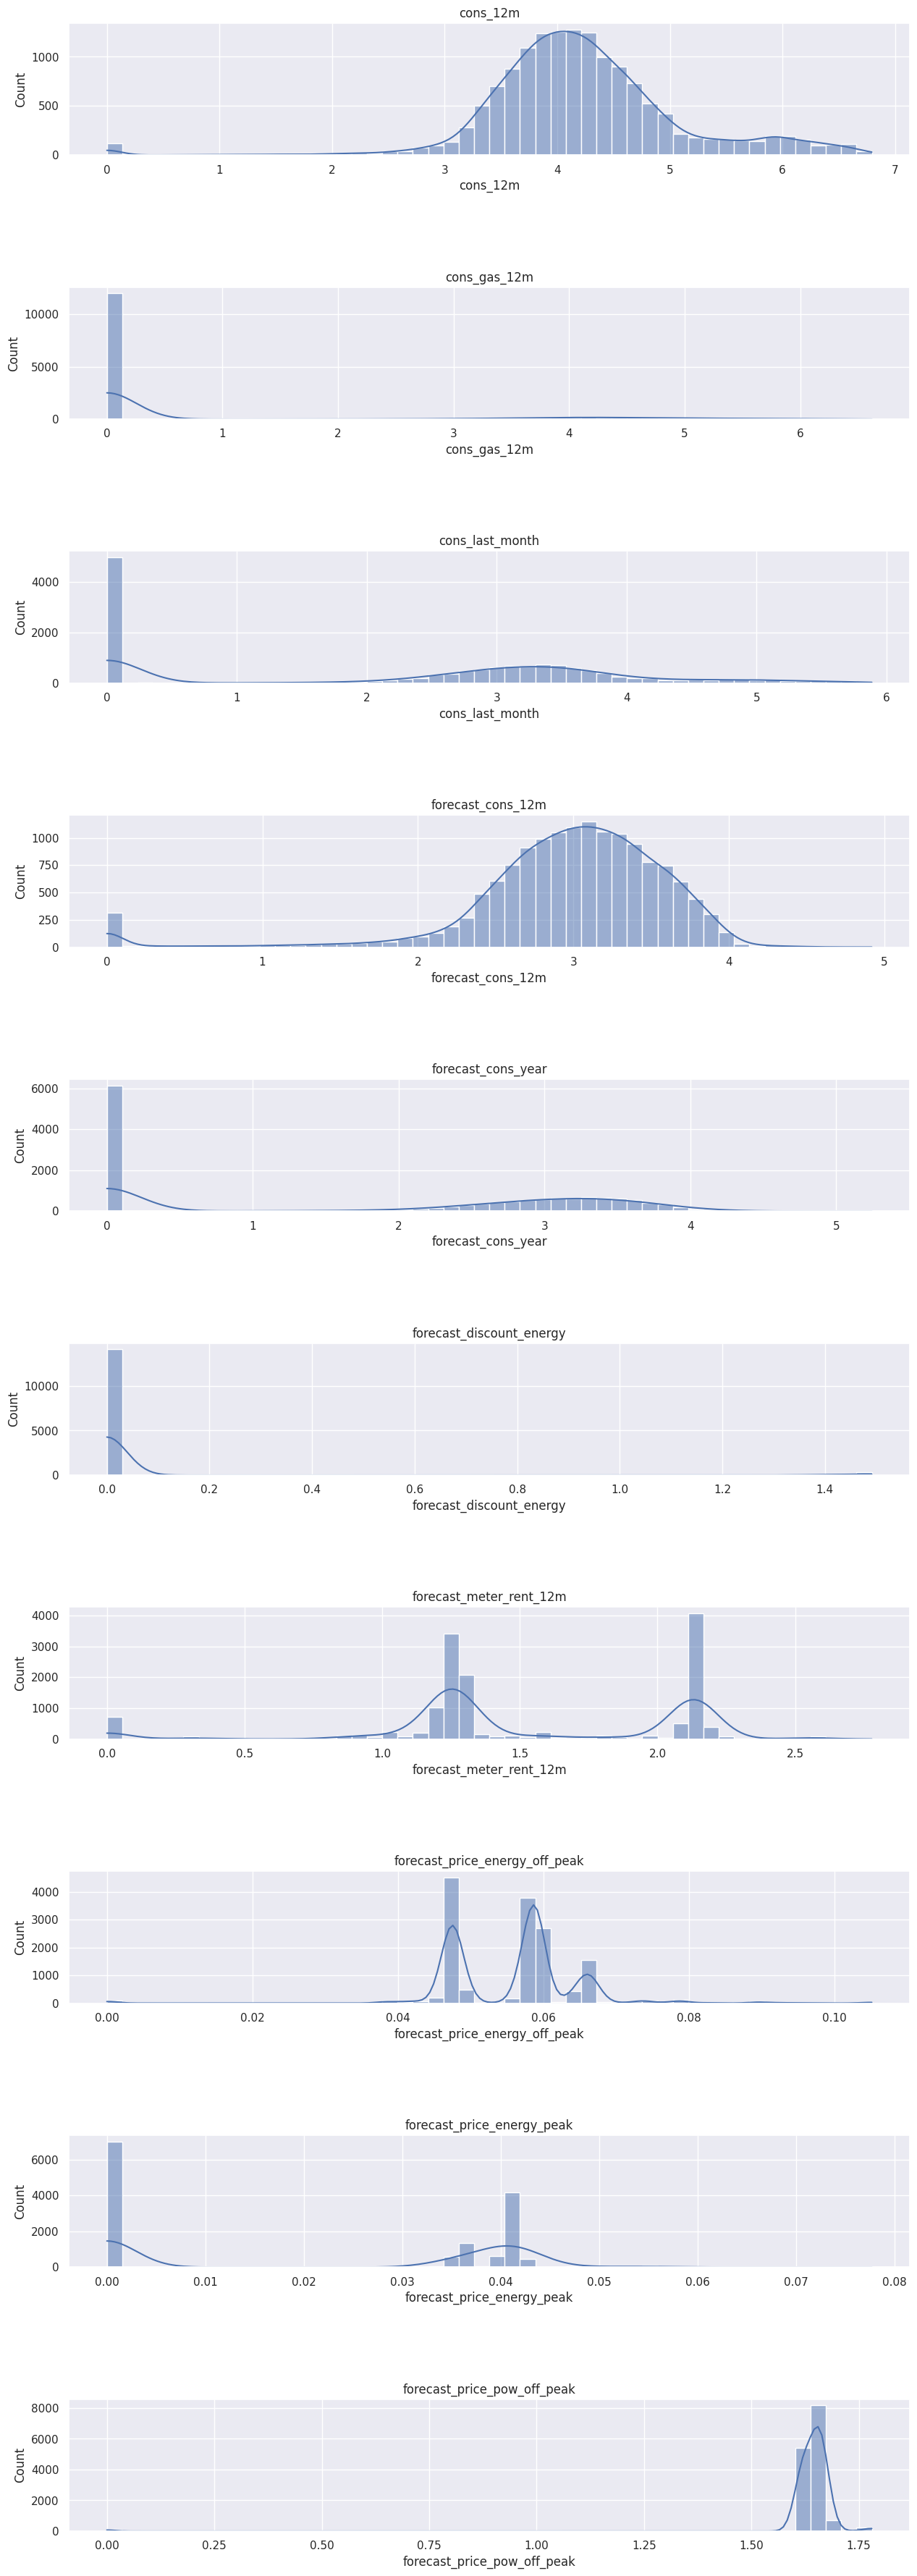

In [ ]:
# create figure
fig, ax = plt.subplots(nrows = len(num_skewed_cols), ncols=1, figsize=(15,45))
fig.subplots_adjust(hspace = 1)

for i, col in enumerate(num_skewed_cols):
    sns.histplot(x=col, data = df, ax=ax[i], bins = 50, kde = True)
    ax[i].set_title(col)

---
## 6. Transforming Categorical data (One-Hot-Encoding)

As we could see only have 2 categorical variables: **channel sales** and **origin up**, these are nominal variables.

We need represent this columns as integers to supply the model, to do this we utilize One Hot Encoding.


In [ ]:
# Get list of categorical variables

s = (df.dtypes == 'object') # get the categorical variables into a Serie
object_cols = list(s[s].index) # convert 's' to a list
object_cols.remove("id") # delete id variable

print("Categorical variables:")
print(object_cols)

Categorical variables:
['channel_sales', 'origin_up']


In [ ]:
#object_cols = ['channel_sales', 'origin_up']
#object_cols

['channel_sales', 'origin_up']

---
### One-Hot-Encoding

Python machine learning library Scikit-learn provides OneHotEncoder() method that can be used for one hot encoding.

This create a new feature for every unique value of a categorical column, and fills this column with either a 1 or a 0 to indicate that this company does or does not belong to this category.

In [ ]:
# Apply one-hot encoder 
# -- handle_unknown='ignore' : to avoid errors when the validation data contains classes that aren't represented in the training data
# -- sparse=False : ensures that the encoded columns are returned as a numpy array (instead of a sparse matrix)

# 1.- Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False) # create the OneHotEncoder object
OHE_cols = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))

# 2.- One-hot encoding removed index; put it back
OHE_cols.index = df.index

# 3.- Remove categorical columns (will replace with one-hot encoding)
numeric_cols = df.drop(object_cols, axis=1)

# 4.- Add one-hot encoded columns to numerical features
OHE_df = pd.concat([numeric_cols, OHE_cols], axis=1)

# Ensure all columns have string type
OHE_df.columns = OHE_df.columns.astype(str)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
OHE_df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,4,5,6,7,8,9,10,11,12,13
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.000000,0.0,0.444045,0.047073,0.040659,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.000000,0.0,1.237292,0.059075,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.000000,0.0,1.599009,0.066622,0.036589,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.000000,0.0,1.318689,0.059448,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,2.721811,0.0,2.122969,0.048014,0.041399,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Correlations

It reveals the linear relationships between features. We want features to correlate with `churn`, as this will indicate that they are good predictors of it. However features that have a very high correlation can sometimes be suspicious,because 2 columns that have high correlation indicates that they may share a lot of the same information.
* One of the assumptions of any parametric predictive model (as stated earlier) is that all features must be **independent**.
 
* If two features are highly correlated and share similar information, this breaks this assumption.

Ideally, we want a set of features that have 0 correlation with all of the independent variables (except our target variable) and a high correlation with the target variable (churn). However, this is very rarely the case and it is common to have a small degree of correlation between independent features.

So now let's look at how all the features within the model are correlated.

In [ ]:
#Compute pairwise correlation of columns
correlation = OHE_df.corr()

<ipython-input-60-dac2f9b957e7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = OHE_df.corr()


In [ ]:
# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Detect correlations > .90

In [ ]:
abs(correlation)>0.90

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,4,5,6,7,8,9,10,11,12,13
cons_12m,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
cons_gas_12m,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
cons_last_month,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
forecast_cons_12m,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
forecast_cons_year,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
11,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
12,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
# Create correlation matrix
corr_matrix = correlation.abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

<ipython-input-63-252405f504b4>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [ ]:
to_drop

['mean_year_price_off_peak_var',
 'mean_year_price_peak_var',
 'mean_year_price_peak_fix',
 'mean_year_price_mid_peak_fix',
 'mean_year_price_off_peak',
 'mean_year_price_peak',
 'mean_year_price_mid_peak',
 'mean_6m_price_off_peak_var',
 'mean_6m_price_peak_var',
 'mean_6m_price_mid_peak_var',
 'mean_6m_price_off_peak_fix',
 'mean_6m_price_peak_fix',
 'mean_6m_price_mid_peak_fix',
 'mean_6m_price_off_peak',
 'mean_6m_price_peak',
 'mean_6m_price_mid_peak',
 'mean_3m_price_off_peak_var',
 'mean_3m_price_peak_var',
 'mean_3m_price_mid_peak_var',
 'mean_3m_price_off_peak_fix',
 'mean_3m_price_peak_fix',
 'mean_3m_price_mid_peak_fix',
 'mean_3m_price_off_peak',
 'mean_3m_price_peak',
 'mean_3m_price_mid_peak',
 'off_peak_peak_fix_mean_diff',
 'off_peak_mid_peak_fix_mean_diff',
 'off_peak_peak_var_max_monthly_diff',
 'off_peak_mid_peak_var_max_monthly_diff',
 'off_peak_peak_fix_max_monthly_diff',
 'peak_mid_peak_fix_max_monthly_diff',
 'off_peak_mid_peak_fix_max_monthly_diff',
 'months_act

In [ ]:
len(to_drop)

33

In [ ]:
# Drop features 
OHE_df.drop(to_drop, axis=1, inplace=True)
OHE_df.head(3)

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,4,5,6,7,8,9,10,11,12,13
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.0,0.000000,0.0,0.0,0.444045,0.047073,0.040659,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.0,2.280920,0.0,0.0,1.237292,0.059075,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.0,1.689841,0.0,0.0,1.599009,0.066622,0.036589,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


We'll remove two variables which exhibit a high correlation with other independent features.

In [ ]:
#df = df.drop(columns=['num_years_antig', 'forecast_cons_year'])
#df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,tenure,months_activ,months_to_end,months_modif_prod,months_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.047073,0.040659,...,0.085483,0.146033,44.266930,8.145775,44.26693,3,30,5,2,6
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.059075,0.000000,...,0.085483,0.151367,44.444710,0.000000,44.44471,7,76,7,76,4
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.066622,0.036589,...,0.089162,0.172468,44.444710,0.000000,44.44471,6,68,3,68,8
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.059448,0.000000,...,0.000000,0.153133,44.444710,0.000000,44.44471,6,69,2,69,9
4,149d57cf92fc41cf94415803a877cb4b,MISSING,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.048014,0.041399,...,0.033743,0.055866,16.291555,8.145775,24.43733,6,71,2,71,9


#Modelling

We'll use Random Forest classifier to predict customer churn

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

In [ ]:
# Separate target from predictors
y = OHE_df.churn
X = OHE_df.drop(['id','churn'], axis=1)
print(X.shape)
print(y.shape)

(14606, 45)
(14606,)


## Split dataset

In [ ]:
# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
# Divide data into validation and test subsets
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(11684, 45)
(11684,)
(2337, 45)
(2337,)
(585, 45)
(585,)


## Model training

We used a Random Forest classifier. Some advantages of the Random forest are:
* The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
* It is able to handle non-linear parameters better than linear based models

In [ ]:
# RandomForestClassifier from scikit-learn library
# n_estimators - number of decisions trees that will form the random forest

model = RandomForestClassifier(
    n_estimators=1000
)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

## Evaluation

Now let's evaluate how well this trained model is able to predict the values of the test dataset.

We'll use 3 metrics to evaluate performance:

- *Accuracy* = the ratio of correctly predicted observations to the total observations
- *Precision* = the ability of the classifier to not label a negative sample as positive
- Recall = the ability of the classifier to find all the positive samples

In [ ]:
# Get confusion matrix
predictions = model.predict(X_valid)
tn, fp, fn, tp = metrics.confusion_matrix(y_valid, predictions).ravel()

In [ ]:
y_valid.value_counts()

0    2137
1     200
Name: churn, dtype: int64

In [ ]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_valid, predictions)}")
print(f"Precision: {metrics.precision_score(y_valid, predictions)}")
print(f"Recall: {metrics.recall_score(y_valid, predictions)}")

True positives: 18
False positives: 3
True negatives: 2134
False negatives: 182

Accuracy: 0.9208386820710313
Precision: 0.8571428571428571
Recall: 0.09


In [ ]:
print(mean_absolute_error(y_valid, predictions))

0.07916131792896876


**OBSERVATIONS**

* Within the test set about 10% of the rows are churners (churn = 1).
* Client dataset is an imbalanced data set because both classes are not equally distributed among all records.
    * Retention: majority class (90.3%)
	* Churn: 9.7%
    * During the modeling this imbalance lead to a large number of false negatives.
* Looking at the true negatives, we have 2134 out of 2137. This means that out of all the negative cases (churn = 0), we predicted 2134 as negative (hence the name True negative). This is great!
* Looking at the false negatives, this is where we have predicted a client to not churn (churn = 0) when in fact they did churn (churn = 1). This number is quite high at 182, we want to get the false negatives to as close to 0 as we can, so this would need to be addressed when improving the model.
* Looking at false positives, this is where we have predicted a client to churn when they actually didnt churn. For this value we can see there are 3 cases, which is great!
* With the true positives, we can see that in total we have 200 clients that churned in the test dataset. However, we are only able to correctly identify 18 of those 200, which is very poor.
* Looking at the accuracy score, this is very misleading! Hence the use of precision and recall is important. The accuracy score is high, but it does not tell us the whole story.
* Looking at the precision score, this shows us a score of 0.82 which is not bad, but could be improved.
* However, the recall shows us that the classifier has a very poor ability to identify positive samples. This would be the main concern for improving this model!

So overall, we're able to very accurately identify clients that do not churn, but we are not able to predict cases where clients do churn! What we are seeing is that a high % of clients are being identified as not churning when they should be identified as churning. This in turn tells me that the current set of features are not discriminative enough to clearly distinguish between churners and non-churners.


## Model understanding

Feature importances indicate the importance of a feature within the predictive model.

In the Random Forest case, the feature importance represents the number of times each feature is used for splitting across all trees.

In [ ]:
# extract feature importances using the built-in method on the trained model
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

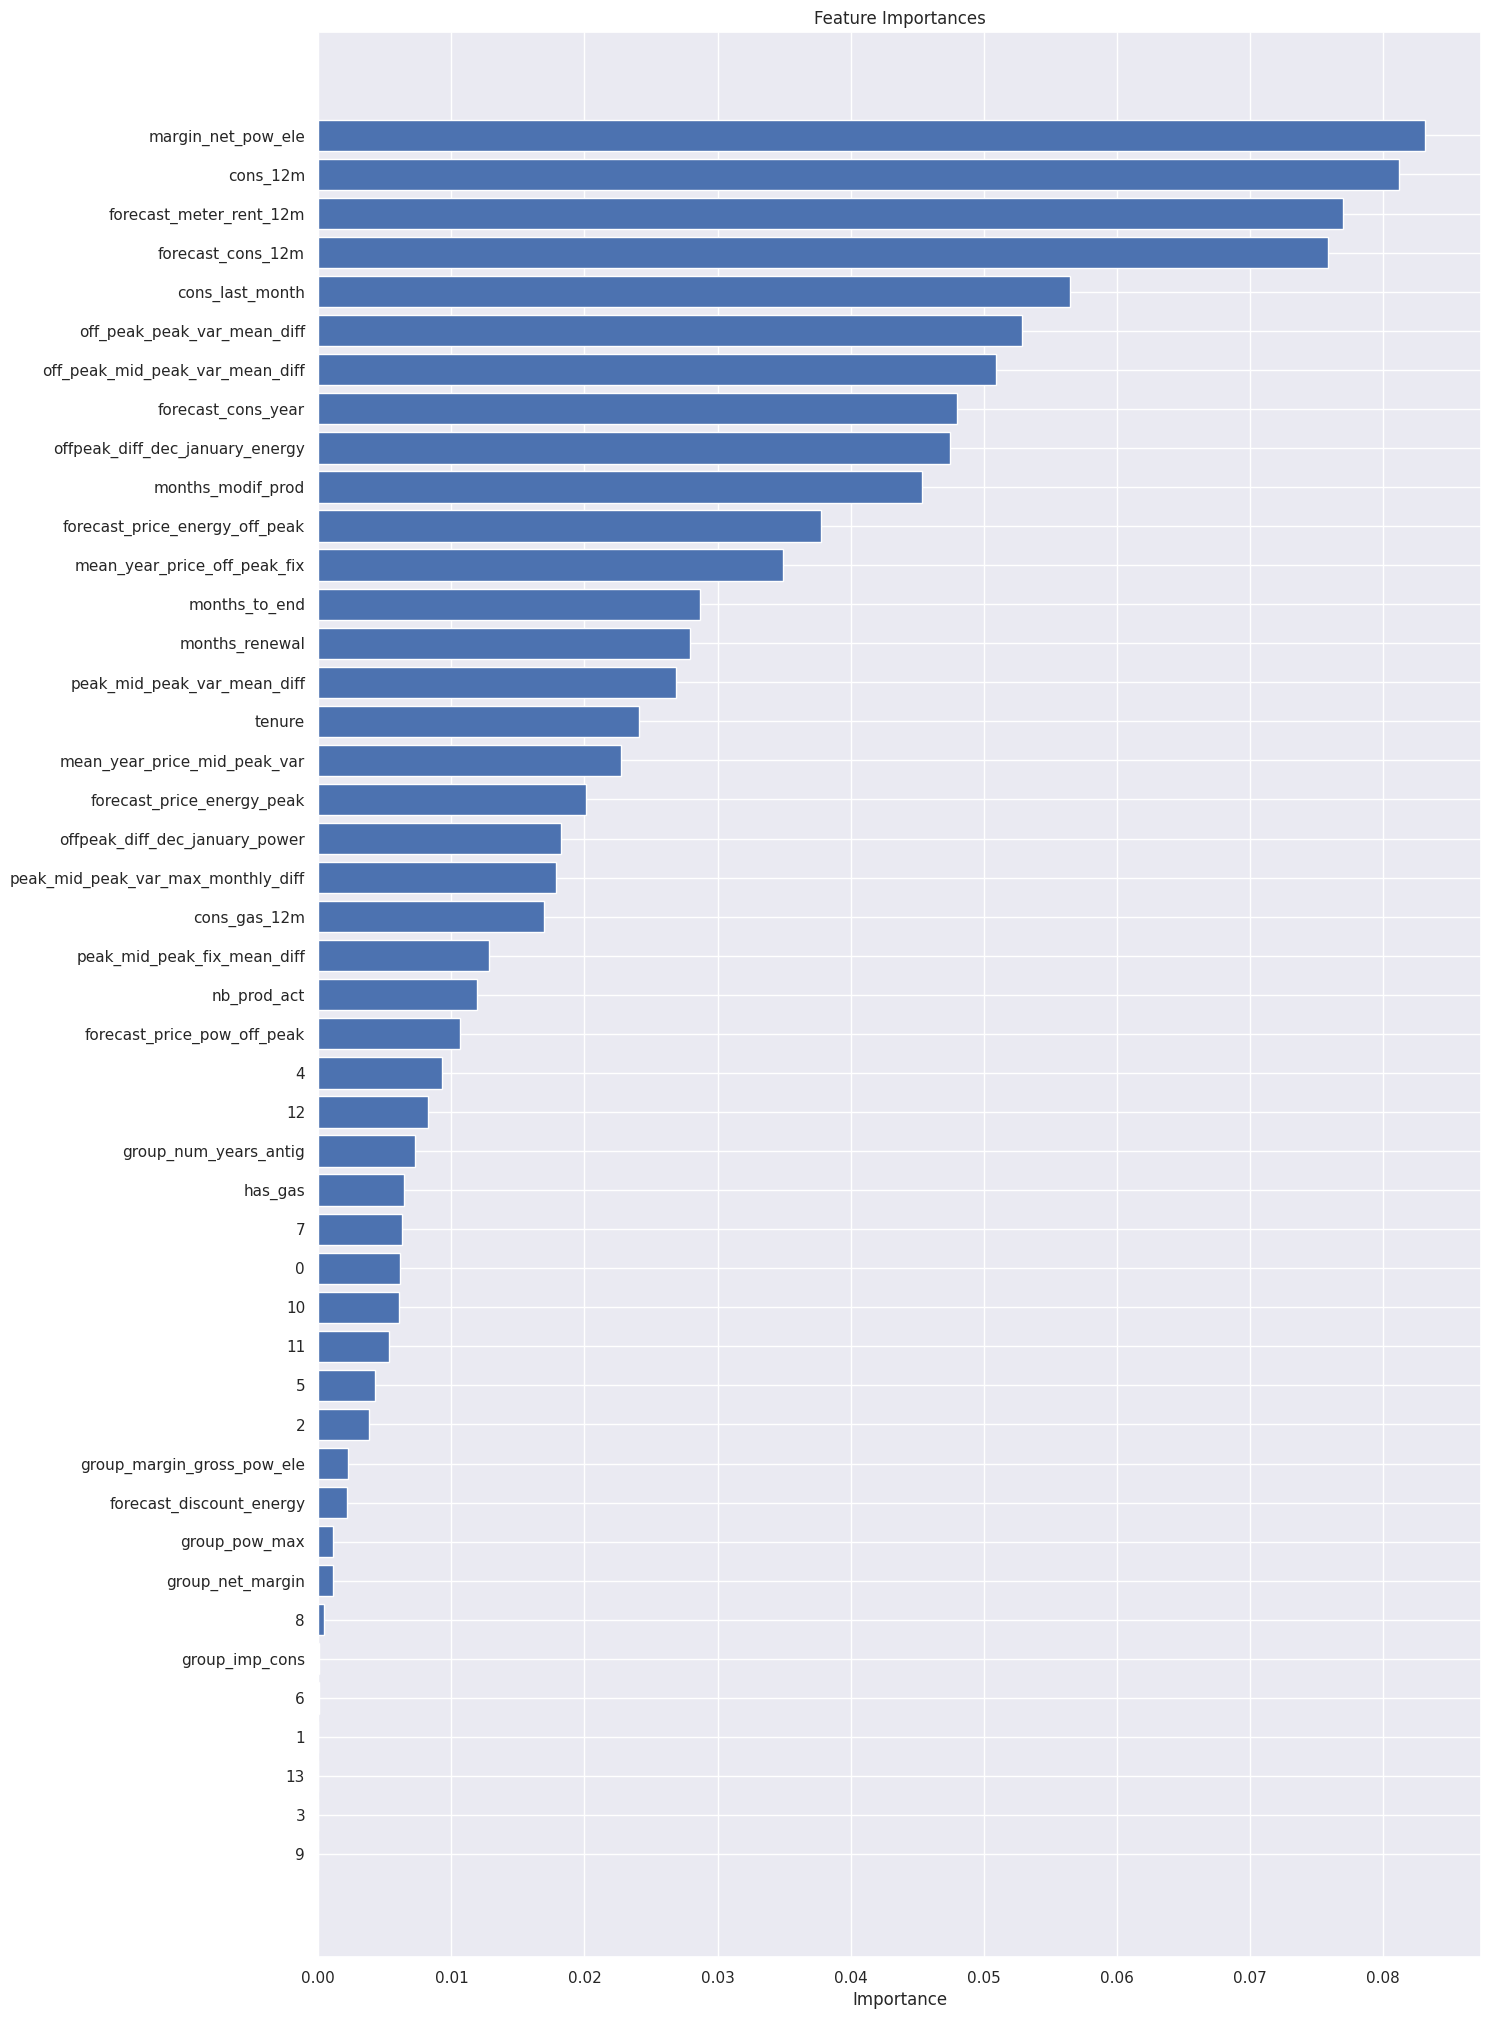

In [ ]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

From this chart, we can observe the following points:

- Net margin and consumption over 12 months is a top driver for churn in this model
- Margin on power subscription also is an influential driver
- Time seems to be an influential factor, especially the number of months they have been active, their tenure and the number of months since they updated their contract
- Our price sensitivity features are scattered around but are not the main driver for a customer churning

The last observation is important because this relates back to our original hypothesis:

    > Is churn driven by the customers' price sensitivity?

Based on the output of the feature importances, it is not a main driver but it is a weak contributor. However, to arrive at a conclusive result, more experimentation is needed.

---
### Summary of conversion rates: 
---

The predictor variables with the greatest impact on the conversion rate seem to be(in order of importance) :


1. net_margin: 24% of conversion rate for values > 1250 and 9.5% conversion rate for values <= 1250
2. margin_gross_pow_ele: 23.5% of conversion rate for values >=90 and 9.5% conversion rate for values <90
3. pow_max: 13.5% of conversion rate for values >=75 y 9.7% for values <75
4. num_years_antig: 13% of conversion rate for values <5 y 7.5% for values >=5
---
5. nb_prod_act: 10% of conversion rate for values <=5 y 0% for values >5
6. cons_12m: 10% of conversion rate for values <= 1,500,000 y 1% for values > 1,500,000
7. con_gas_12m: 9.9% of conversion rate for values <830,000 y 0% for values >=830,000
8. cons_last_month: 9.9% of conversion rate for values < 300,000 y 1% for values >= 300,000 
9. imp_cons: 9.8% of conversion rate for values<300 y 5.5% for values >=300

---
### CONCLUSIONS:

* The 'net_margin' variable followed by the "margin_gross_pow_ele", "pow_max", "num_years_antig", "nb_prod_act", "cons_12m" and "cons_last_month" variables have the greatest impact on the conversion rate.

With this analysis, the profile of the customer who could churn the company to whom a discount could offered would be:


* Clients with total net margin greater than 1250
* Have a gross margin on power subscription greater than or equal 90
* Be subscribed to a power greater than or equal to 75
* Client with less than 5 antiquity years
* Have less than 5 active products and services
* Have a electricity consumption of the past 12 months less than or equal to 1,500,000
* Have consumed less than 300,000 of electricity the last month
---

Save predictions

In [ ]:
proba_predictions = model.predict_proba(X_valid)
probabilities = proba_predictions[:, 1]

In [ ]:
X_valid = X_valid.reset_index()
X_valid.drop(columns='index', inplace=True)

In [ ]:
X_valid['churn'] = predictions.tolist()
X_valid['churn_probability'] = probabilities.tolist()
X_valid.to_csv('out_of_sample_data_with_predictions.csv')